In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler       # scaling data
from sklearn.model_selection import train_test_split # splitting data

In [83]:
data = pd.read_csv('new.csv',encoding='cp1252',dtype={'id': 'str', 'livingRoom': 'str', 'drawingRoom': 'str','bathRoom': 'str'})
data.head()

/Users/ashleyzhou/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floorfixed
0,https://bj.lianjia.com/chengjiao/101084782030....,1.01E+11,116.475489,40.019520,1.110000e+12,8/9/2016,1464.0,106,415.0,31680,...,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0,26
1,https://bj.lianjia.com/chengjiao/101086012217....,1.01E+11,116.453917,39.881534,1.110000e+12,7/28/2016,903.0,126,575.0,43436,...,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0,22
2,https://bj.lianjia.com/chengjiao/101086041636....,1.01E+11,116.561978,39.877145,1.110000e+12,12/11/2016,1271.0,48,1030.0,52021,...,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0,4
3,https://bj.lianjia.com/chengjiao/101086406841....,1.01E+11,116.438010,40.076114,1.110000e+12,9/30/2016,965.0,138,297.5,22202,...,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0,21
4,https://bj.lianjia.com/chengjiao/101086920653....,1.01E+11,116.428392,39.886229,1.110000e+12,8/28/2016,927.0,286,392.0,48396,...,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0,6


In [84]:
# Cleaning up data

# filter out 'id'
data = data.iloc[:,2:]


def filter_nulls(data):
    for column in data.columns:
        data = data[data[column].notnull()]
        
    return data
data = filter_nulls(data)



In [85]:
# #normalize
# from sklearn import preprocessing
# names = data.columns
# scaled_data = preprocessing.normalize(data)
# scaled_data = pd.DataFrame(scaled_data, columns=names)

In [86]:
# Add two new columns that individually record year and month of that row
month = []
year = []
for date in data['tradeTime']:
    month.append(date.split('/')[0])
    year.append(date[-2:])

data['month'] = month
data['year'] = year
data = data.drop('tradeTime', axis=1)

data['month']=data['month'].astype('int64')
data['year']=data['year'].astype('int64')




In [87]:
data.head()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floorfixed,month,year
0,116.475489,40.019520,1.110000e+12,1464.0,106,415.0,31680,131.00,2,1,...,6,0.217,1.0,0.0,1.0,7,56021.0,26,8,16
1,116.453917,39.881534,1.110000e+12,903.0,126,575.0,43436,132.38,2,2,...,6,0.667,1.0,1.0,0.0,7,71539.0,22,7,16
2,116.561978,39.877145,1.110000e+12,1271.0,48,1030.0,52021,198.00,3,2,...,6,0.500,1.0,0.0,0.0,7,48160.0,4,12,16
3,116.438010,40.076114,1.110000e+12,965.0,138,297.5,22202,134.00,3,1,...,6,0.273,1.0,0.0,0.0,6,51238.0,21,9,16
4,116.428392,39.886229,1.110000e+12,927.0,286,392.0,48396,81.00,2,1,...,2,0.333,0.0,1.0,1.0,1,62588.0,6,8,16


In [88]:
# # Handling missing values
# col_name = data.columns
# from sklearn.impute import SimpleImputer
# impu = SimpleImputer()
# data = pd.DataFrame(impu.fit_transform(data))
# data.columns = col_name

# data['month']=data['month'].astype('int64')
# data['year']=data['year'].astype('int64')

In [89]:
# ####### checking variance, for variance selector we need to specify a threshold (e.g. 0.01) to actually remove features
# ####### or use along with select percentile
# all_data.var().sort_values()

In [90]:
# #Removing features with low variance
# def variance_threshold_selector(data,threshold):
#     sel = VarianceThreshold(threshold) 
#     sel.fit(data)
#     return data[data.columns[sel.get_support(indices=True)]]


# var_threshold = variance_threshold_selector(data, threshold=8.082569) 


# data.shape

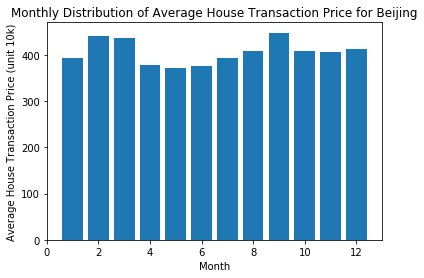

In [95]:
# distribution of the average housing transaction price (unit is 10k) each month
price_month = data.groupby('month').mean()
plt.bar(price_month.index, price_month.totalPrice)
plt.xlabel('Month')
plt.ylabel('Average House Transaction Price (unit 10k)')
plt.title('Monthly Distribution of Average House Transaction Price for Beijing' )
plt.show()


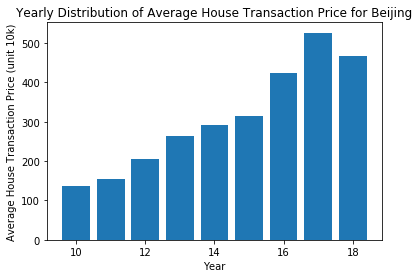

In [97]:
# distribution of the average housing transaction price (unit is 10k) each year
price_year = data.groupby('year').mean()
plt.bar(price_year.index, price_year.totalPrice)
plt.xlabel('Year')
plt.ylabel('Average House Transaction Price (unit 10k)')
plt.title('Yearly Distribution of Average House Transaction Price for Beijing' )
plt.show()
